<a href="https://colab.research.google.com/github/ankitasajjan/OperationsResearch-OR-Problems/blob/main/timeseries_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Time Series Analysis
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn
%matplotlib inline

In [19]:
# uplaoding data file
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD (1).csv


In [20]:
bitcoin = pd.read_csv("BTC-USD.csv")

In [21]:
# top 5 rows of file
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-31,1026.640015,1074.920044,1026.640015,1071.790039,1071.790039,447287008
1,2017-04-01,1071.709961,1091.719971,1061.089966,1080.500000,1080.500000,289633984
2,2017-04-02,1080.609985,1107.589966,1075.449951,1102.170044,1102.170044,514187008
3,2017-04-03,1102.949951,1151.739990,1102.949951,1143.810059,1143.810059,580444032
4,2017-04-04,1145.520020,1156.439941,1120.520020,1133.250000,1133.250000,436310016


In [22]:
#file dta
bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-31,1026.640015,1074.920044,1026.640015,1071.790039,1071.790039,447287008
1,2017-04-01,1071.709961,1091.719971,1061.089966,1080.500000,1080.500000,289633984
2,2017-04-02,1080.609985,1107.589966,1075.449951,1102.170044,1102.170044,514187008
3,2017-04-03,1102.949951,1151.739990,1102.949951,1143.810059,1143.810059,580444032
4,2017-04-04,1145.520020,1156.439941,1120.520020,1133.250000,1133.250000,436310016
...,...,...,...,...,...,...,...
1822,2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722
1823,2022-03-28,46821.851563,48086.835938,46690.203125,47128.003906,47128.003906,36362175703
1824,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069
1825,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962


In [23]:
# summary statistics
bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,17456.650489,17925.175203,16944.484022,17479.398063,17479.398063,2.238066e+10
std,17536.334594,18000.323025,17004.420360,17541.079431,17541.079431,2.077598e+10
min,1026.640015,1074.920044,1026.640015,1071.790039,1071.790039,1.832310e+08
25%,6411.719971,6531.754883,6310.985108,6410.245118,6410.245118,5.295540e+09
50%,9202.458008,9358.589844,9032.079102,9205.726563,9205.726563,1.844427e+10
75%,27220.950196,28613.290039,26783.865235,28101.695312,28101.695312,3.317659e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [24]:
# summary statistics for open
bitcoin['Open'].describe()

count     1827.000000
mean     17456.650489
std      17536.334594
min       1026.640015
25%       6411.719971
50%       9202.458008
75%      27220.950196
max      67549.734375
Name: Open, dtype: float64

In [25]:
# creating return series
bitcoin['Return'] = bitcoin['Adj Close'].pct_change()

In [26]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2017-03-31,1026.640015,1074.920044,1026.640015,1071.790039,1071.790039,447287008,NaN
1,2017-04-01,1071.709961,1091.719971,1061.089966,1080.500000,1080.500000,289633984,0.008127
2,2017-04-02,1080.609985,1107.589966,1075.449951,1102.170044,1102.170044,514187008,0.020056
3,2017-04-03,1102.949951,1151.739990,1102.949951,1143.810059,1143.810059,580444032,0.037780
4,2017-04-04,1145.520020,1156.439941,1120.520020,1133.250000,1133.250000,436310016,-0.009232


In [28]:
np.mean(bitcoin['Return'])

0.0029462650818983375

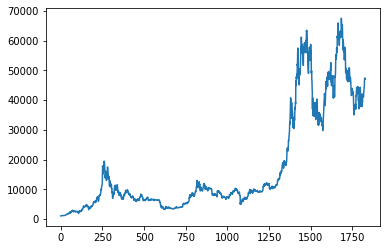

In [32]:
#plotting closing price
ax1=bitcoin['Adj Close'].plot(style=['-'])

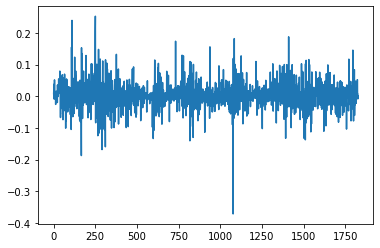

In [33]:
# plot return
ax2=bitcoin['Return'].plot(style='-')

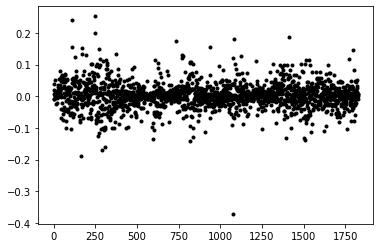

In [36]:
# plot return
bitcoin['Return'].plot(style='k.')

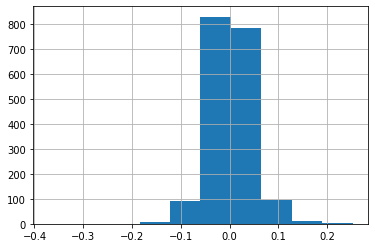

In [37]:
# plot return
bitcoin['Return'].hist()

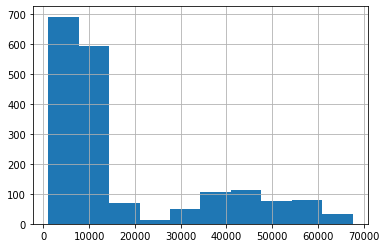

In [38]:
# plot return
bitcoin['Adj Close'].hist()

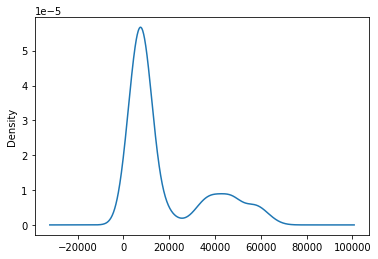

In [39]:
#Kernel Density
bitcoin['Adj Close'].plot(kind='kde')

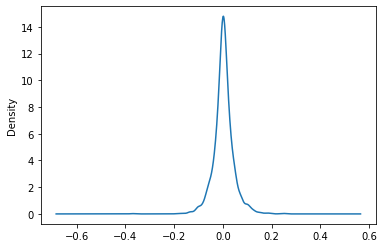

In [41]:
# Kernel Density for return
bitcoin['Return'].plot(kind='kde')

In [42]:
# exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(bitcoin['Adj Close']).fit(smoothing_level = .01, optimized = False)

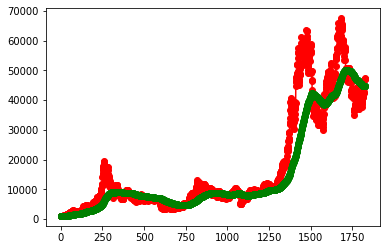

In [50]:
bitcoin['Adj Close'].plot(marker='o',color='red')
model.fittedvalues.plot(marker='o',color='green')

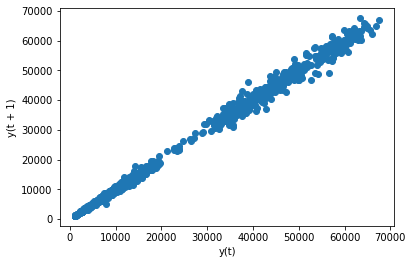

In [52]:
#lag plot to check if the series is random
from pandas.plotting import lag_plot
lag_plot(bitcoin['Adj Close'])

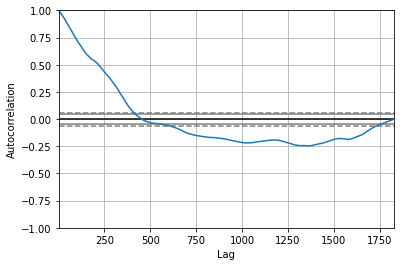

In [53]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(bitcoin['Adj Close'])